In [1]:
import jsonlines
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
collected_info = []
with jsonlines.open('collected_info.jsonl') as reader:
    for obj in reader:
        collected_info.append(obj)


In [3]:
df = pd.DataFrame.from_dict(collected_info)
df.head()

,rep_url,rep_size_on_disk,rep_total_files,rep_total_py_files,com_msg,com_msg_lang,com_num_files,com_hash,com_author,com_committer,...,com_num_py_files,com_py2add_lines,com_py2del_lines,com_py2paths,com_py2nloc,com_py2lines_after,com_py2lines_before,com_py2imports_before,com_py2imports_after,com_py2ch_type
0,https://github.com/knadh/ml2en,143694,121,4,"Fix README description, examples, and version",True,2,cf0c1b432def6b35af5115d34a85c0af6fd38cbe,Kailash Nadh,Kailash Nadh,...,1,{'1_setup.py': 1},{'1_setup.py': 1},"{'1_setup.py': ['setup.py', 'setup.py']}",{'1_setup.py': 26},{'1_setup.py': 44},{'1_setup.py': 46},{'1_setup.py': ['from ml2en import ml2en ']},{'1_setup.py': ['from ml2en import ml2en ']},{'1_setup.py': 'MODIFY'}
1,https://github.com/knadh/ml2en,143694,121,4,Adjust ml2en python scripts to pep8 indentatio...,False,2,1130192e3a60aafe50e069f353bb91cbccbc5913,Shreehari,Shreehari,...,2,"{'0_ml2en.py': 204, '1_ml2en.py': 205}","{'0_ml2en.py': 121, '1_ml2en.py': 122}","{'0_ml2en.py': ['ml2en.py', 'ml2en.py'], '1_ml...","{'0_ml2en.py': 170, '1_ml2en.py': 172}","{'0_ml2en.py': 217, '1_ml2en.py': 217}","{'0_ml2en.py': 134, '1_ml2en.py': 134}","{'0_ml2en.py': ['import re'], '1_ml2en.py': ['...","{'0_ml2en.py': ['import re'], '1_ml2en.py': ['...","{'0_ml2en.py': 'MODIFY', '1_ml2en.py': 'MODIFY'}"
2,https://github.com/knadh/ml2en,143694,121,4,Fixed comment typo,False,3,20172811d7ba6113115fdf464de56aab9aa82a6a,Kailash Nadh,Kailash Nadh,...,1,{'2_ml2en.py': 1},{'2_ml2en.py': 1},"{'2_ml2en.py': ['ml2en.py', 'ml2en.py']}",{'2_ml2en.py': 87},{'2_ml2en.py': 178},{'2_ml2en.py': 178},{'2_ml2en.py': []},{'2_ml2en.py': []},{'2_ml2en.py': 'MODIFY'}
3,https://github.com/knadh/ml2en,143694,121,4,Made transliterate() static,True,1,304ad8a713d6f13215082e4ae3fdb169a160a0e7,Kailash Nadh,Kailash Nadh,...,0,{},{},{},{},{},{},{},{},{}
4,https://github.com/knadh/ml2en,143694,121,4,Added new rule for ukaram+chandrakkala,True,4,a0762eff9e576707ca890e11b142d9daa913b192,Kailash Nadh,Kailash Nadh,...,1,{'2_ml2en.py': 1},{'2_ml2en.py': 1},"{'2_ml2en.py': ['ml2en.py', 'ml2en.py']}",{'2_ml2en.py': 87},{'2_ml2en.py': 178},{'2_ml2en.py': 178},{'2_ml2en.py': []},{'2_ml2en.py': []},{'2_ml2en.py': 'MODIFY'}


In [4]:
df_grouped = df.groupby(by='rep_url')[['rep_size_on_disk', 'rep_total_files', 'rep_total_py_files']].mean()

In [5]:
df_grouped = df_grouped.reset_index()

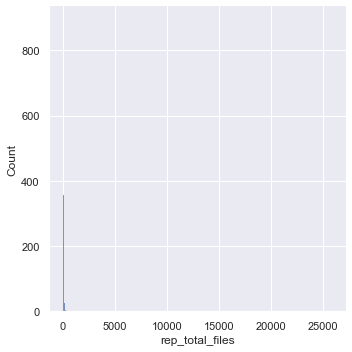

In [6]:
sns.displot(df_grouped, x='rep_total_files')

In [7]:
df_grouped = df_grouped.loc[df_grouped['rep_total_files'] < 500]

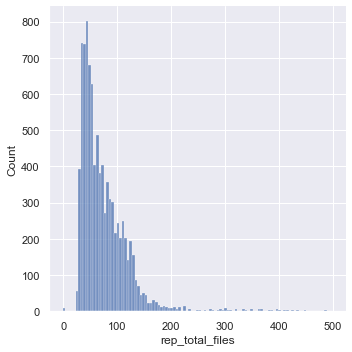

In [8]:
sns.displot(df_grouped, x='rep_total_files')

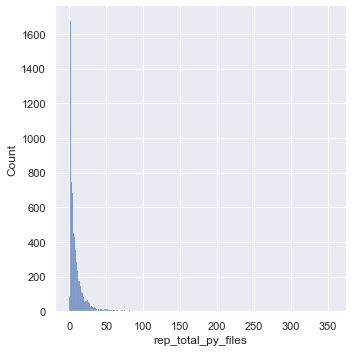

In [9]:
sns.displot(df_grouped, x='rep_total_py_files')

In [10]:
df_grouped['py_perc'] = df_grouped['rep_total_py_files'] / df_grouped['rep_total_files']

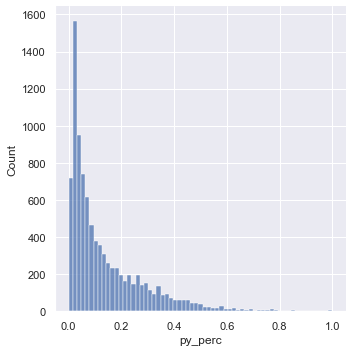

In [11]:
sns.displot(df_grouped, x='py_perc')

In [12]:
print(*df.columns.to_list())

rep_url rep_size_on_disk rep_total_files rep_total_py_files com_msg com_msg_lang com_num_files com_hash com_author com_committer committer_date com_branches com_in_main_branch com_merge com_deletions com_insertions com_lines com_dmm_unit_size com_dmm_unit_complexity com_dmm_unit_interfacing com_len_mod_files com_num_py_files com_py2add_lines com_py2del_lines com_py2paths com_py2nloc com_py2lines_after com_py2lines_before com_py2imports_before com_py2imports_after com_py2ch_type


## Main info

In [13]:
print('Num of downloaded revisions:', df.shape[0])
print('Num of repos:', len(df.rep_url.unique()))

Num of downloaded revisions: 145392
Num of repos: 9409


In [14]:
print('Empty commit percentage =', sum(df.com_msg.str.strip().str.len() == 0) / df.shape[0])
print('clever English commit percentage =', 1 - sum(df.com_msg_lang.apply(bool)) / df.shape[0])
com_msg_is_eng = df.com_msg.apply(lambda x: x.isascii())
print('naive English commit percentage =', sum(com_msg_is_eng) / df.shape[0])

Empty commit percentage = 0.0019258281060856167
clever English commit percentage = 0.7594090458897326
naive English commit percentage = 0.9846552767690107


In [15]:
print('Mean modified files per commit:', df.com_num_files.mean(), '+-', df.com_num_files.std())
print('Mean modified files per commit (2):', df.com_len_mod_files.mean(), '+-', df.com_len_mod_files.std())

Mean modified files per commit: 9.435367833168263 +- 223.3064453438519
Mean modified files per commit (2): 9.435897435897436 +- 223.30647950052884


In [16]:
print('Mean PY files per commit:', df.com_num_py_files.mean(), '+-', df.com_num_py_files.std())

Mean PY files per commit: 3.4638425773082426 +- 60.46061749201764


In [17]:
print('Main branch commits percentage:', sum(df.com_in_main_branch) / df.shape[0])
print('Merge commits percentage:', sum(df.com_merge) / df.shape[0])

Main branch commits percentage: 1.0
Merge commits percentage: 0.0


In [18]:
print('Mean modified lines per commit', df.com_lines.mean(), '+-', df.com_lines.std())
print('Mean deletions lines per commit', df.com_deletions.mean(), '+-', df.com_deletions.std())
print('Mean insertions lines per commit', df.com_insertions.mean(), '+-', df.com_insertions.std())

Mean modified lines per commit 4532.052334378783 +- 201968.29169298132
Mean deletions lines per commit 714.5677891493342 +- 40688.65590009832
Mean insertions lines per commit 3817.4845452294485 +- 196171.00107930604


In [19]:
print('Mean dmm_unit_size:', df.com_dmm_unit_size.mean()) 
print('Mean dmm_unit_interfacing:', df.com_dmm_unit_interfacing.mean())
# lower - more risky

Mean dmm_unit_size: 0.5734325050761717
Mean dmm_unit_interfacing: 0.6594479726951256


In [20]:
print('Only PY file per100:', df[(df.com_num_py_files==1) & (df.com_num_files==1)].shape[0] / df.shape[0])

Only PY file per100: 0.4751430615164521


In [21]:
print('Only PY file + message per100:', df[(df.com_num_py_files==1) & (df.com_num_files==1) & (df.com_msg.str.len()>0)].shape[0] / df.shape[0])


Only PY file + message per100: 0.47415263563332233


In [22]:
df['naive_en'] = df.com_msg.apply(lambda x: x.isascii())
rep2en = {}
for row_idx, row in df.iterrows():
    rep = row['rep_url']
    if rep not in rep2en:
        rep2en[rep] = True
    if not row['naive_en']:
        rep2en[rep] = False

In [23]:
df['rep_lang'] = df['rep_url'].apply(lambda x: rep2en[x])

In [24]:
len(df.loc[(df['rep_lang'] == True)]['rep_url'].unique()) / len(df.rep_url.unique())

0.9537676692528431

## Work with Python only (en)

In [25]:
df_good = df[(df.com_num_py_files==1) & (df.com_num_files==1) & (df.com_msg.str.len()>0) & (df.rep_lang==True)]
df_good = df_good[(df_good.com_lines<1000)]

In [26]:
print('Mean modified lines per commit', df_good.com_lines.mean(), '+-', df_good.com_lines.std())
print('Mean deletions lines per commit', df_good.com_deletions.mean(), '+-', df_good.com_deletions.std())
print('Mean insertions lines per commit', df_good.com_insertions.mean(), '+-', df_good.com_insertions.std())

Mean modified lines per commit 30.653203841185352 +- 66.9369002696711
Mean deletions lines per commit 8.755957105725981 +- 29.341417959900184
Mean insertions lines per commit 21.89724673545937 +- 52.55358838099476


In [27]:
max(df_good.com_lines)

992

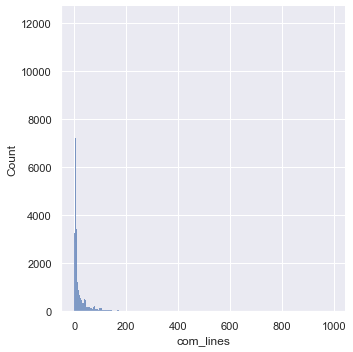

In [28]:
sns.displot(df_good, x='com_lines')

## Delete big changes

In [29]:
df_good = df[(df.com_num_py_files==1) & (df.com_num_files==1) & (df.com_msg.str.len()>0) & (df.rep_lang==True)]
df_good = df_good[(df_good.com_lines<50)]

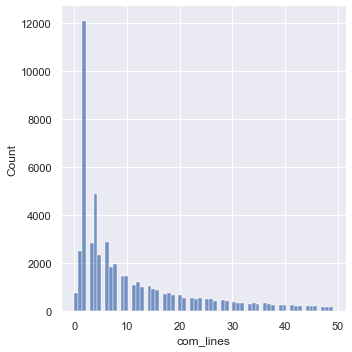

In [30]:
sns.displot(df_good, x='com_lines')

In [31]:
df_good.shape

(54086, 33)

## Watch filters

In [32]:
filters = ['numpy', 'pandas', 'sklearn', 'keras', 'torch', 'transformers', 'tensorflow',
           'scipy', 'statsmodels', 'flask', 'django', 'fastapi', 'gensim', 'nltk']

In [33]:
def is_filtered_before(row, filters=filters):
    libs = ''
    for k, v in row['com_py2imports_before'].items():
        libs += ' '.join(v)
        
    for fil in filters:
        if fil in libs:
            return 1
    return 0

def is_filtered_after(row, filters=filters):
    libs = ''
    for k, v in row['com_py2imports_after'].items():
        libs += ' '.join(v)
        
    for fil in filters:
        if fil in libs:
            return 1
    return 0

In [34]:
print('Num of good commits with filter before:', sum(df_good.apply(lambda x: is_filtered_before(x), axis=1)))
print('Num of good commits with filter after:', sum(df_good.apply(lambda x: is_filtered_after(x), axis=1)))

Num of good commits with filter before: 10012
Num of good commits with filter after: 10411


In [35]:
print('Percentage good commits with filter before:', sum(df_good.apply(lambda x: is_filtered_before(x), 
                                                                       axis=1)) / df.shape[0])
print('Percentage good commits with filter after:', sum(df_good.apply(lambda x: is_filtered_after(x), 
                                                                      axis=1)) / df.shape[0])

Percentage good commits with filter before: 0.06886211070760427
Percentage good commits with filter after: 0.07160641575877627


In [36]:
df_good['filt_web'] = df_good.apply(lambda x: is_filtered_before(x), axis=1)
web_repos = df_good.loc[(df_good['filt_web']==1), :]['rep_url'].unique()
len(web_repos) / len(df.rep_url.unique())

0.18514188542884472

In [37]:
web_repos[:20]

array(['https://github.com/johnboxall/django-ab',
       'https://github.com/leah/django-elsewhere',
       'https://github.com/howiworkdaily/django-newsletter',
       'https://github.com/ericflo/django-tokyo-sessions',
       'https://github.com/ericflo/django-couch-lifestream',
       'https://github.com/rcrowley/django-twitterauth',
       'https://github.com/lethain/django-userskins',
       'https://github.com/lethain/django-springsteen',
       'https://github.com/idan/djoosh',
       'https://github.com/montylounge/django-google-analytics',
       'https://github.com/lincolnloop/django-protected-files',
       'https://github.com/ella/django-ratings',
       'https://github.com/jezdez/django-comment-utils',
       'https://github.com/alex/django-plugins',
       'https://github.com/danfairs/fez.djangoskel',
       'https://github.com/svetlyak40wt/django-pingback',
       'https://github.com/bjornkri/django-tumblr',
       'https://github.com/jchris/portable-google-app-engine-sd

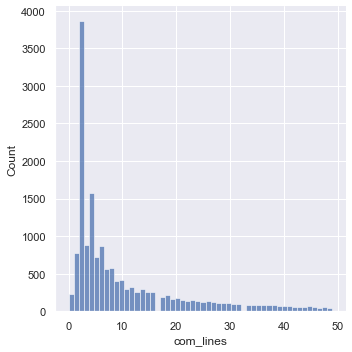

In [38]:
sns.displot(df_good[df_good['rep_url'].isin(web_repos)], x='com_lines')

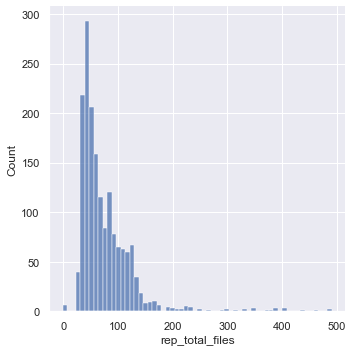

In [39]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(web_repos)], x='rep_total_files')

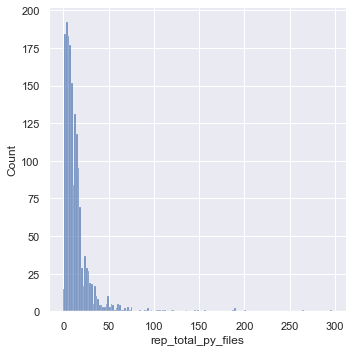

In [40]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(web_repos)], x='rep_total_py_files')

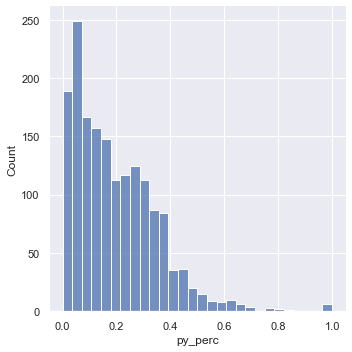

In [41]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(web_repos)], x='py_perc')

## ML Filters

In [42]:
filters_no_web = ['sklearn', 'keras', 'torch', 'transformers', 'tensorflow',
                  'gensim']

In [43]:
print('Percentage good commits with filter before:', sum(df_good.apply(lambda x: is_filtered_before(x, 
                                                                                                    filters_no_web), 
                                                                       axis=1)) / df.shape[0])
print('Percentage good commits with filter after:', sum(df_good.apply(lambda x: is_filtered_after(x,
                                                                                                 filters_no_web), 
                                                                      axis=1)) / df.shape[0])

Percentage good commits with filter before: 0.00147188290965115
Percentage good commits with filter after: 0.0015337845273467592


In [44]:
sum(df_good.apply(lambda x: is_filtered_before(x, filters_no_web), axis=1))

214

In [45]:
df_good['filt_ml'] = df_good.apply(lambda x: is_filtered_before(x, filters_no_web), axis=1)

In [46]:
ml_repos = df_good.loc[(df_good['filt_ml']==1), :]['rep_url'].unique()

In [47]:
len(ml_repos) / len(df.rep_url.unique()), len(ml_repos)

(0.0070145605271548514, 66)

In [48]:
ml_repos[:20]

array(['https://github.com/petewarden/mlloworld',
       'https://github.com/hammer/wikichallenge',
       'https://github.com/mattspitz/sluggerml',
       'https://github.com/coreylynch/enrontopicmodelling',
       'https://github.com/drjasondavis/lending-club-learning',
       'https://github.com/gburlet/chordrecog',
       'https://github.com/wcbeard/authorship-attribution',
       'https://github.com/naftaliharris/wordpress-lda',
       'https://github.com/dell-zhang/zmusic_code',
       'https://github.com/camdavidsonpilon/graphical-lasso-in-finance',
       'https://github.com/nournia/wikifier',
       'https://github.com/aflag/captcha-study',
       'https://github.com/coreylynch/sklearn-transform',
       'https://github.com/ramarlina/som',
       'https://github.com/cjdd3b/nicar2013',
       'https://github.com/benhamner/bluebookforbulldozers',
       'https://github.com/3003/normalized-searchengine-index-distance',
       'https://github.com/raghavan/semi-supervised-learning'

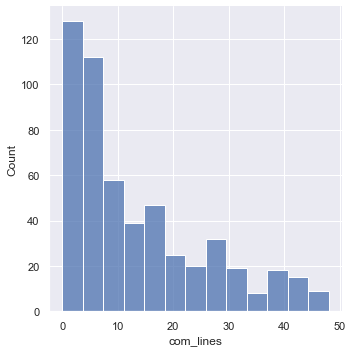

In [49]:
sns.displot(df_good[df_good['rep_url'].isin(ml_repos)], x='com_lines')

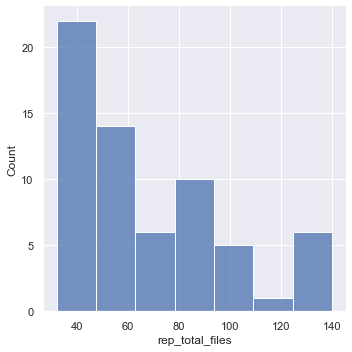

In [50]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(ml_repos)], x='rep_total_files')

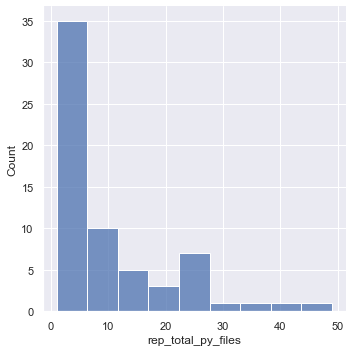

In [51]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(ml_repos)], x='rep_total_py_files')

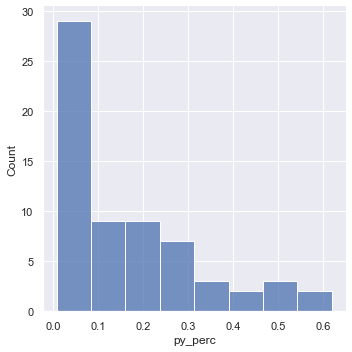

In [52]:
sns.displot(df_grouped[df_grouped['rep_url'].isin(ml_repos)], x='py_perc')

## Watch libs

In [53]:
def extract_libname(import_line): # Not works with relative pathes
    imp_ = import_line[:]
    import_line = import_line.strip()
    if import_line[:6] == 'import':
        import_line = import_line[7:].strip()
        as_idx = import_line.find(' as ')
        if as_idx >= 0:
            import_line = import_line[:as_idx].strip()
    else:
        import_line = import_line[4:].strip()
        import_line = import_line.split(' import ')[0].strip()
    if import_line.split('.')[0].strip() == '':
        # print(imp_)
        pass
    return import_line.split('.')[0].strip()

In [54]:
a = ['import re',
 'import numpy as np',
 'import os',
 'import sys',
 'import pandas as pd',
 'from tqdm import tqdm',
 'from math import log',
 'from sklearn.metrics import r2_score']

[extract_libname(b) for b in a]

['re', 'numpy', 'os', 'sys', 'pandas', 'tqdm', 'math', 'sklearn']

In [55]:
from collections import Counter

libs_cnt = Counter()
for row_idx, row in df_good.iterrows():
    for k, v in row['com_py2imports_before'].items():
        for imp_line in v:
            libs_cnt[extract_libname(imp_line)] += 1

In [56]:
libs_cnt.most_common(30)

[('django', 18254),
 ('os', 15713),
 ('sys', 12371),
 ('time', 8161),
 ('re', 7651),
 ('datetime', 5775),
 ('logging', 5016),
 ('json', 3633),
 ('urllib', 3471),
 ('subprocess', 3274),
 ('numpy', 3059),
 ('google', 2782),
 ('', 2761),
 ('setuptools', 2602),
 ('urllib2', 2570),
 ('twisted', 2556),
 ('random', 2509),
 ('optparse', 2436),
 ('__future__', 2163),
 ('socket', 2153),
 ('collections', 2119),
 ('threading', 1925),
 ('argparse', 1829),
 ('math', 1686),
 ('hashlib', 1679),
 ('urlparse', 1610),
 ('xml', 1552),
 ('struct', 1446),
 ('shutil', 1436),
 ('tornado', 1397)]

In [57]:
def has_relative_import(row):
    for k, v in row['com_py2imports_before'].items():
        for imp_line in v:
            if extract_libname(imp_line) == '':
                return 1
    return 0

df_good['has_rel_imp'] = df_good.apply(lambda x: has_relative_import(x), axis=1)
print('Without rel imp:', 1 - sum(df_good['has_rel_imp']) / df_good.shape[0])

Without rel imp: 0.9712494915504937


In [58]:
df_good['rep_url'].shape[0] / df.shape[0]

0.3720012105205238